Import des librairies

In [51]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

R√©cup√©rer les donn√©es avec Alpha Vintage

In [52]:
apikey = "270E1RIWIZ5ZK8A2"

# Liste des actifs √† analyser avec leurs symboles Alpha Vantage
actifs = {
    "Bitcoin": "BTCUSD",  # Bitcoin en dollars
    "Or": "XAUUSD",  # Prix de l'or en dollars
    "S&P 500": "SPY"  # ETF du S&P 500
}

# Dictionnaire pour stocker les donn√©es
resultats = {}

for nom, symbole in actifs.items():
    # Requ√™te API pour r√©cup√©rer les donn√©es mensuelles
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol={symbole}&apikey={apikey}"
    r = requests.get(url)
    data = r.json()

    # Extract des donn√©es
    time_series = data.get("Monthly Time Series", {})

    # Transf les donn√©es en DataFrame
    df = pd.DataFrame.from_dict(time_series, orient="index")

    # Renommer les colonnes en fran√ßais
    df.columns = ["Ouverture", "Haut", "Bas", "Cl√¥ture", "Volume"]

    # Convertir l'index en datetime
    df.index = pd.to_datetime(df.index)

    # Ajouter des colonnes "Ann√©e" et "Mois"
    df["Ann√©e"] = df.index.year
    df["Mois"] = df.index.month

    # Filtrer les donn√©es pour les 4 derni√®res ann√©es
    df = df[df.index >= "2020-01-01"]

    # Trier par date (du plus ancien au plus r√©cent)
    df = df.sort_index()

    df = df[["Ann√©e", "Mois", "Ouverture", "Haut", "Bas", "Cl√¥ture", "Volume"]]

    # Stocker dans le dict
    resultats[nom] = df

    # Sauvegarde en CSV
    df.to_csv(f"{nom}_5_ans_par_mois.csv", index=False)

# Afficher un exemple de r√©sultat pour Bitcoin
print(resultats["Bitcoin"])

            Ann√©e  Mois    Ouverture         Haut         Bas      Cl√¥ture  \
2020-01-31   2020     1    7190.6005    9574.4994   6870.7240    9350.8328   
2020-02-29   2020     2    9350.4719   10503.1782   8440.7014    8525.9295   
2020-03-31   2020     3    8527.1303    9195.2664   3836.9059    6413.0223   
2020-04-30   2020     4    6415.3477    9461.1138   6153.4737    8623.0469   
2020-05-31   2020     5    8621.6808   10067.3335   8125.3912    9448.1873   
...           ...   ...          ...          ...         ...          ...   
2024-10-31   2024    10   63317.1173   73611.7879  58919.4223   70205.1188   
2024-11-30   2024    11   70203.7695   99815.8387  66791.8510   96464.5682   
2024-12-31   2024    12   96469.4654  108353.1197  91312.4134   93390.5555   
2025-01-31   2025     1   93376.2698  109349.9753  89116.8579  102409.6846   
2025-02-13   2025     2  102415.4928  102773.0727  10000.0000   95570.0364   

             Volume  
2020-01-31  2343316  
2020-02-29  23188

Pre-processing des donn√©es

In [53]:
# Charger les fichiers CSV
bitcoin = pd.read_csv("Bitcoin_5_ans_par_mois.csv")
gold = pd.read_csv("Or_5_ans_par_mois.csv")
sp500 = pd.read_csv("S&P 500_5_ans_par_mois.csv")

# Ajouter une colonne "Actif" pour identifier les donn√©es
bitcoin["Actif"] = "Bitcoin"
gold["Actif"] = "Or"
sp500["Actif"] = "S&P 500"

# Fusionner toutes les donn√©es en un seul DataFrame
df_total = pd.concat([bitcoin, gold, sp500])
print(df_total.head())

# V√©rification des types de donn√©es
print("\n Types de donn√©es :")
print(df_total.dtypes)

# V√©rification des donn√©es manquantes
print("\n Donn√©es manquantes :")
print(df_total.isnull().sum())

# V√©rification des doublons
print("\n Nombre de doublons :")
print(df_total.duplicated().sum())

# Affichage des doublons s'ils existent
if df_total.duplicated().sum() > 0:
    print("\n Doublons trouv√©s :")
    print(df_total[df_total.duplicated()])



   Ann√©e  Mois  Ouverture        Haut        Bas    Cl√¥ture   Volume    Actif
0   2020     1  7190.6005   9574.4994  6870.7240  9350.8328  2343316  Bitcoin
1   2020     2  9350.4719  10503.1782  8440.7014  8525.9295  2318820  Bitcoin
2   2020     3  8527.1303   9195.2664  3836.9059  6413.0223  5955546  Bitcoin
3   2020     4  6415.3477   9461.1138  6153.4737  8623.0469  3525791  Bitcoin
4   2020     5  8621.6808  10067.3335  8125.3912  9448.1873  3749452  Bitcoin

 Types de donn√©es :
Ann√©e          int64
Mois           int64
Ouverture    float64
Haut         float64
Bas          float64
Cl√¥ture      float64
Volume         int64
Actif         object
dtype: object

 Donn√©es manquantes :
Ann√©e        0
Mois         0
Ouverture    0
Haut         0
Bas          0
Cl√¥ture      0
Volume       0
Actif        0
dtype: int64

 Nombre de doublons :
0


Analyse exploratoire des donn√©es

In [54]:
print("Statistiques Bitcoin :\n", bitcoin.describe(), "\n")
print("Statistiques Or :\n", gold.describe(), "\n")
print("Statistiques S&P 500 :\n", sp500.describe(), "\n")

Statistiques Bitcoin :
              Ann√©e       Mois      Ouverture           Haut           Bas  \
count    62.000000  62.000000      62.000000      62.000000     62.000000   
mean   2022.096774   6.338710   37515.847037   43553.586400  31649.983465   
std       1.500925   3.538748   22939.301803   25916.639273  19479.851809   
min    2020.000000   1.000000    6415.347700    9195.266400   3836.905900   
25%    2021.000000   3.000000   19902.849800   24141.486425  17585.686925   
50%    2022.000000   6.000000   33880.945000   40654.171150  28754.608850   
75%    2023.000000   9.000000   54492.534800   63486.403500  42928.794775   
max    2025.000000  12.000000  102415.492800  109349.975300  91312.413400   

             Cl√¥ture        Volume  
count      62.000000  6.200000e+01  
mean    38941.824553  2.631965e+06  
std     23755.908634  2.778254e+06  
min      6413.022300  1.795960e+05  
25%     20160.187725  5.472108e+05  
50%     34853.220550  1.800994e+06  
75%     57525.764900 

Actif
Bitcoin    31617.854947
Or           446.420621
S&P 500      101.412844
dtype: float64


C:\Users\bd_ta\AppData\Local\Temp\ipykernel_25884\3587394262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ecart_type.index, y=ecart_type.values, palette="coolwarm")


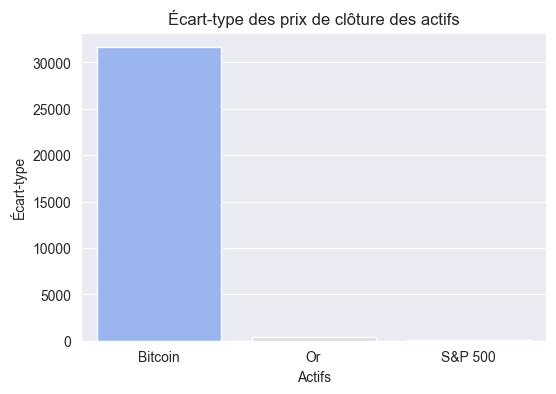

In [55]:
# Cr√©er la table pivot avec les prix de cl√¥ture par actif
df_pivot = df_total.pivot_table(index='Ann√©e', columns='Actif', values='Cl√¥ture', aggfunc='mean')

# Calculer l'√©cart-type pour chaque actif
ecart_type = df_pivot.std()

# Afficher les r√©sultats
print(ecart_type)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x=ecart_type.index, y=ecart_type.values, palette="coolwarm")
plt.title("√âcart-type des prix de cl√¥ture des actifs")
plt.ylabel("√âcart-type")
plt.xlabel("Actifs")
plt.show()

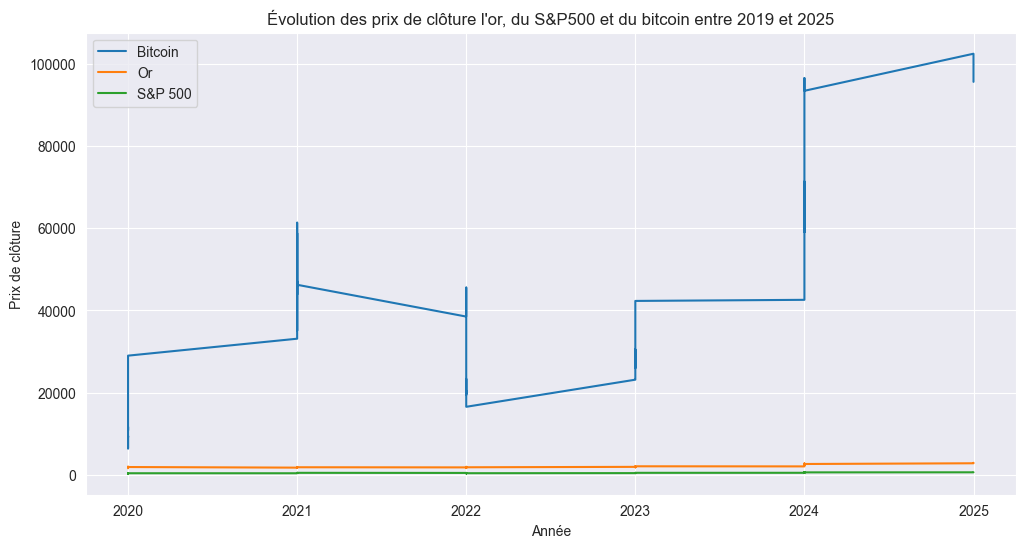

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for actif in df_total['Actif'].unique():
    subset = df_total[df_total['Actif'] == actif]
    plt.plot(subset['Ann√©e'], subset['Cl√¥ture'], label=actif)

plt.legend()
plt.title("√âvolution des prix de cl√¥ture l'or, du S&P500 et du bitcoin entre 2019 et 2025")
plt.xlabel("Ann√©e")
plt.ylabel("Prix de cl√¥ture")
plt.show()

In [57]:
#(Prix de vente - prix d'achat)/prix d'achat
#M√©thode .pct_change()

# Conversion en num√©rique
df_total['Cl√¥ture'] = pd.to_numeric(df_total['Cl√¥ture'], errors='coerce')

# Calcul du rendement
df_total['Rendement'] = df_total.groupby('Actif')['Cl√¥ture'].pct_change()

#Rendement quotidien sous forme de tableau
print(df_total[['Actif', 'Ann√©e', 'Rendement']])

df_total['Rendement'] = df_total.groupby('Actif')['Cl√¥ture'].pct_change()

# Cr√©ation des sous-graphes (1 par actif)
fig, axes = plt.subplots(len(df_total['Actif'].unique()), 1, figsize=(10, 6), sharex=True)

for ax, actif in zip(axes, df_total['Actif'].unique()):
    subset = df_total[df_total['Actif'] == actif]
    ax.plot(subset['Ann√©e'], subset['Rendement'], label=f'Rendement {actif}', color='green')

    ax.set_title(f'Rendement - {actif}')
    ax.axhline(0, linestyle='--', color='black', alpha=0.7)  # Ligne z√©ro pour rep√®re
    ax.legend()
    ax.set_ylabel('Rendement')

plt.xlabel('Ann√©e')
plt.tight_layout()
plt.show()


      Actif  Ann√©e  Rendement
0   Bitcoin   2020        NaN
1   Bitcoin   2020  -0.088217
2   Bitcoin   2020  -0.247821
3   Bitcoin   2020   0.344615
4   Bitcoin   2020   0.095690
..      ...    ...        ...
57  S&P 500   2024  -0.008924
58  S&P 500   2024   0.059634
59  S&P 500   2024  -0.027334
60  S&P 500   2025   0.026856
61  S&P 500   2025   0.002559

[179 rows x 3 columns]


Nouvelles valeurs √† calculer

In [58]:
#Check des valeurs d√©j√† pr√©sentes
print(df_total.head())  
print(df_total.columns)  


   Ann√©e  Mois  Ouverture        Haut        Bas    Cl√¥ture   Volume    Actif  \
0   2020     1  7190.6005   9574.4994  6870.7240  9350.8328  2343316  Bitcoin   
1   2020     2  9350.4719  10503.1782  8440.7014  8525.9295  2318820  Bitcoin   
2   2020     3  8527.1303   9195.2664  3836.9059  6413.0223  5955546  Bitcoin   
3   2020     4  6415.3477   9461.1138  6153.4737  8623.0469  3525791  Bitcoin   
4   2020     5  8621.6808  10067.3335  8125.3912  9448.1873  3749452  Bitcoin   

   Rendement  
0        NaN  
1  -0.088217  
2  -0.247821  
3   0.344615  
4   0.095690  
Index(['Ann√©e', 'Mois', 'Ouverture', 'Haut', 'Bas', 'Cl√¥ture', 'Volume',
       'Actif', 'Rendement'],
      dtype='object')


In [59]:
#Calcul de la volatilit√©
df_total['Volatilit√©'] = df_total.groupby('Actif')['Rendement'].rolling(window=14).std().reset_index(level=0, drop=True)


# Calcul du RSI (avec une bonne gestion du groupby)
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Appliquer la fonction par groupe
df_total['RSI'] = df_total.groupby('Actif')['Cl√¥ture'].transform(compute_rsi)


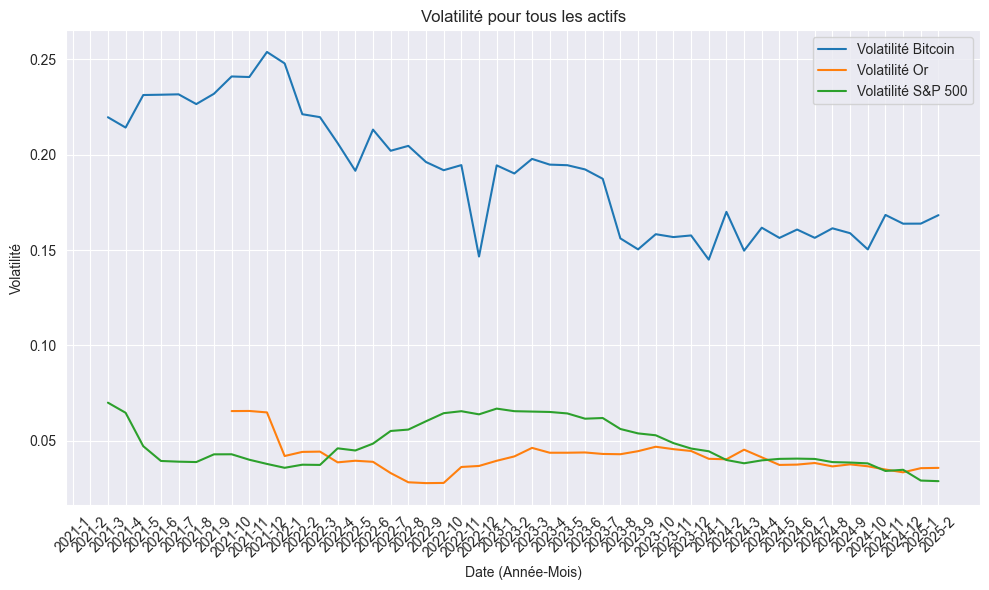

In [60]:
# Cr√©ation du graphique pour la volatilit√©
plt.figure(figsize=(10, 6))

# Tracer la volatilit√© pour chaque actif
for actif_a_afficher in df_total["Actif"].unique():
    subset = df_total[df_total["Actif"] == actif_a_afficher]
    plt.plot(subset["Ann√©e"].astype(str) + "-" + subset["Mois"].astype(str), subset["Volatilit√©"], label=f"Volatilit√© {actif_a_afficher}")

# Personnalisation du graphique
plt.title("Volatilit√© pour tous les actifs")
plt.xlabel("Date (Ann√©e-Mois)")
plt.ylabel("Volatilit√©")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


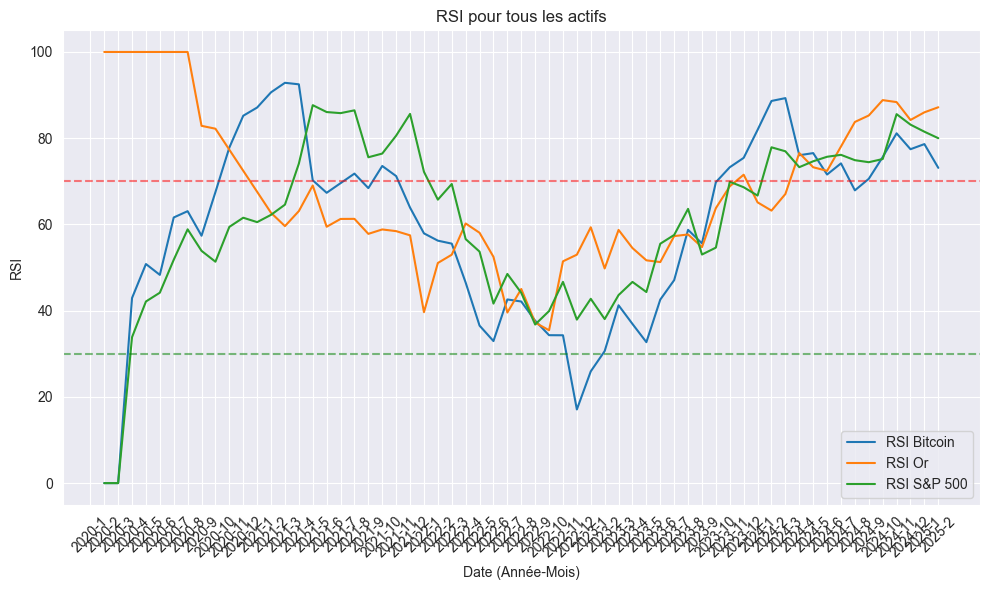

In [61]:
# Cr√©ation du graphique avec "Ann√©e" et "Mois"
plt.figure(figsize=(10, 6))

# Tracer le RSI pour chaque actif
for actif_a_afficher in df_total["Actif"].unique():
    subset = df_total[df_total["Actif"] == actif_a_afficher]
    plt.plot(subset["Ann√©e"].astype(str) + "-" + subset["Mois"].astype(str), subset["RSI"], label=f"RSI {actif_a_afficher}")

# Ajouter les lignes de surachat et survente
plt.axhline(70, linestyle="--", color="red", alpha=0.5)  # Surachat
plt.axhline(30, linestyle="--", color="green", alpha=0.5)  # Survente

# Personnalisation du graphique
plt.title("RSI pour tous les actifs")
plt.xlabel("Date (Ann√©e-Mois)")
plt.ylabel("RSI")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


Machine learning - Pr√©diction du prix de cl√¥ture pour l'or

Evolution du cours de l'or actuellement

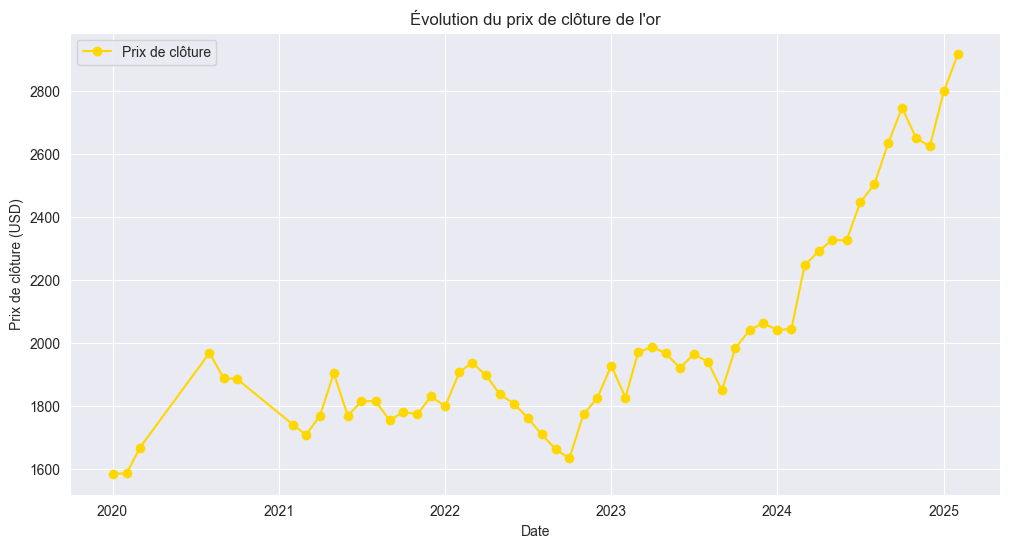

In [62]:
# Charger les donn√©es de l'or
gold = pd.read_csv("Or_5_ans_par_mois.csv")

# V√©rifier le format de la colonne 'Ann√©e' et 'Mois' pour cr√©er une date
gold["Date"] = pd.to_datetime(gold["Ann√©e"].astype(str) + "-" + gold["Mois"].astype(str))

# Tracer l'√©volution du prix de cl√¥ture
plt.figure(figsize=(12,6))
plt.plot(gold["Date"], gold["Cl√¥ture"], marker='o', linestyle='-', color='gold', label="Prix de cl√¥ture")

# Personnalisation du graphique
plt.xlabel("Date")
plt.ylabel("Prix de cl√¥ture (USD)")
plt.title("√âvolution du prix de cl√¥ture de l'or")
plt.legend()
plt.grid(True)

plt.show()


Importation des librairies

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print(df_total.columns)  # V√©rification des variables pr√©sentes dans le df

Index(['Ann√©e', 'Mois', 'Ouverture', 'Haut', 'Bas', 'Cl√¥ture', 'Volume',
       'Actif', 'Rendement', 'Volatilit√©', 'RSI'],
      dtype='object')


S√©lection des colonnes de caract√©ristiques et de la target

In [64]:
#S√©paration des donn√©es par actif (Bitcoin, Or, S&P 500)
bitcoin_data = df_total[df_total['Actif'] == 'Bitcoin']
gold_data = df_total[df_total['Actif'] == 'Or']
sp500_data = df_total[df_total['Actif'] == 'S&P 500']

#S√©paration des donn√©es par ann√©e pour l'entra√Ænement et la pr√©diction
train_data_gold = gold_data[gold_data['Ann√©e'] < 2024] #Donn√©es entra√Ænement de 2020 √† 2024
test_data_gold = gold_data[gold_data['Ann√©e'] == 2024] #Donn√©es √† pr√©dire = 2024

features = ["RSI", "Rendement", "Haut", "Bas", "Ouverture", "Volatilit√©"]
X_train_gold = train_data_gold[features]
y_train_gold = train_data_gold['Cl√¥ture']
X_test_gold = test_data_gold[features]
y_test_gold = test_data_gold['Cl√¥ture']

X_gold = gold_data[features]  # Variables ind√©pendantes
y_gold = gold_data['Cl√¥ture']  # Variable cible

# Suppression des lignes contenant des NaN
X_train_gold = X_train_gold.dropna()
y_train_gold = y_train_gold[X_train_gold.index]  # Met √† jour y_train_gold pour avoir les m√™mes indices

# Supprimer les lignes avec NaN dans les deux jeux de donn√©es
df_gold = df_total[df_total['Actif'] == 'Or'].dropna(subset=['Cl√¥ture', 'RSI', 'Rendement', 'Haut', 'Bas', 'Ouverture', 'Volatilit√©'])
X_gold = df_gold[['Ouverture', 'Haut', 'Bas', 'RSI', 'Volatilit√©', 'Rendement']]
y_gold = df_gold['Cl√¥ture']



Diviser les donn√©es en test et train (pas utile car s√©paration en fonction de l'ann√©e)

In [65]:
#X_train_gold, X_test_gold, y_train_gold, y_test_gold = train_test_split(X_gold,y_gold, test_size=0.2, random_state=42)

#Suppression des NaN pour faire fonctionner le mod√®le
#df_total = df_total.dropna()


Choix du mod√®le et entra√Ænement 

In [66]:
model_gold = LinearRegression()
model_gold.fit(X_train_gold, y_train_gold)

#Pr√©diction sur l'ensemble de test
y_pred = model_gold.predict(X_test_gold)

print(X_train_gold.columns)

Index(['RSI', 'Rendement', 'Haut', 'Bas', 'Ouverture', 'Volatilit√©'], dtype='object')


Pr√©dictions du mod√®le

In [67]:
y_pred_gold = model_gold.predict(X_test_gold)

Validation crois√©e

In [68]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_gold, X_gold, y_gold, cv=5, scoring='neg_mean_squared_error')
print(f"Scores de validation crois√©e : {scores}")
print(f"RMSE moyen : {np.mean(np.sqrt(-scores))}")


Scores de validation crois√©e : [ -86.91405261 -344.33177577  -26.48967747 -100.65047201 -685.16802299]
RMSE moyen : 13.846789435665823


In [69]:
from sklearn.metrics import mean_squared_error, r2_score
 
#Calcul de l'erreur MSE et du score R¬≤**
test_mse = mean_squared_error(y_test_gold, y_pred_gold)
test_r2 = r2_score(y_test_gold, y_pred_gold)

print(test_mse)
print(test_r2)

355.7614167266299
0.9929270353221541


Visualisation des pr√©dictions par rapport aux donn√©es r√©elles

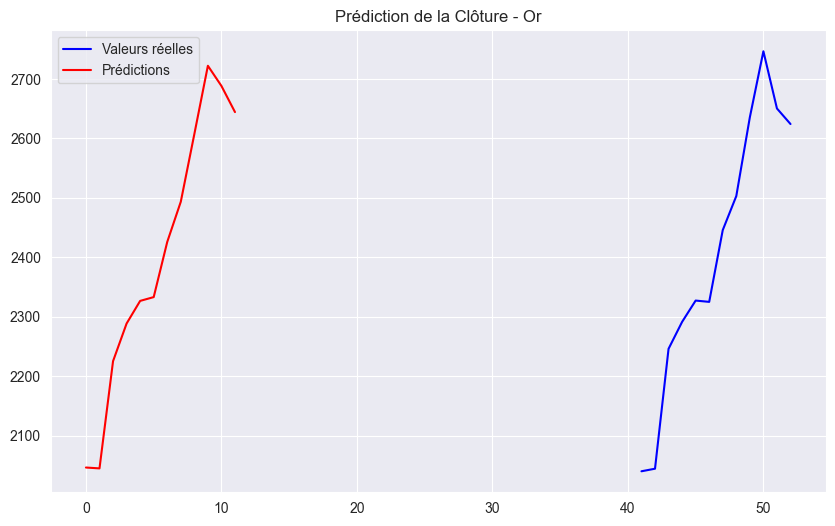

In [70]:
#Visualisation des r√©sultats
plt.figure(figsize=(10, 6))
plt.plot(y_test_gold.index, y_test_gold, label='Valeurs r√©elles', color='blue')
plt.plot(y_pred_gold, label='Pr√©dictions', color='red')
plt.title('Pr√©diction de la Cl√¥ture - Or')
plt.legend()
plt.show()

Minimisation des erreurs avec un gradient descent > mod√®le SGDRegressor de scikit learn

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# Normalisation des donn√©es
scaler = StandardScaler()
X_train_gold_scaled = scaler.fit_transform(X_train_gold)
X_test_gold_scaled = scaler.transform(X_test_gold)

# Entra√Ænement du mod√®le avec les donn√©es normalis√©es
model_gold = SGDRegressor(max_iter=10000, tol=1e-4, eta0=0.0001)  # Ajuste le taux d'apprentissage si n√©cessaire
model_gold.fit(X_train_gold_scaled, y_train_gold)

# Afficher les coefficients et l'intercept
print(f"Coefficients : {model_gold.coef_}")
print(f"Intercept : {model_gold.intercept_}")



Coefficients : [20.87812452 27.16787037 33.1424304  28.8273499  24.64573494 -1.08590428]
Intercept : [1480.7502263]


C:\Users\bd_ta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [72]:
from sklearn.metrics import mean_squared_error

# Pr√©dictions sur le test set
y_pred = model_gold.predict(X_test_gold_scaled)

# Calcul du MSE
mse = mean_squared_error(y_test_gold, y_pred)
print(f"Mean Squared Error: {mse}")

# Calcul du RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 179247.87367575502
Root Mean Squared Error: 423.3767514587392


Pr√©diction du prix de cl√¥ture pour le S&P500 avec la r√©gression lin√©aire

In [73]:
Features = ["Ouverture", "Haut", "Bas", "RSI", "Volatilit√©", "Rendement"]
X_sp500 = sp500_data [['Ouverture', 'Haut', 'Bas', 'Volatilit√©', 'Rendement', 'RSI']]  # Variables ind√©pendantes
y_sp500 = sp500_data['Cl√¥ture']  # Variable cible

#Supression des donn√©es NaN car non g√©r√©es par le mod√®le
df_cleaned = df.dropna()

In [74]:
X_train_sp500, X_test_sp500, y_train_sp500, y_test_sp500 = train_test_split(X_sp500,y_sp500, test_size=0.2, random_state=42)

X_train_sp500 = X_train_sp500.dropna()
y_train_sp500 = y_train_sp500.loc[X_train_sp500.index]  # Ajuster y en cons√©quence
X_test_sp500 = X_test_sp500.dropna()
y_test_sp500 = y_test_sp500.loc[X_test_sp500.index]


In [75]:
model_sp500 = LinearRegression()
model_sp500.fit(X_train_sp500, y_train_sp500)

#Pr√©diction sur l'ensemble de test
y_pred_sp500 = model_sp500.predict(X_test_sp500)

In [76]:
from sklearn.model_selection import cross_val_score

X_sp500 = X_sp500.dropna()
y_sp500 = y_sp500.loc[X_sp500.index]  


scores = cross_val_score(model_sp500, X_sp500, y_sp500, cv=5, scoring='neg_mean_squared_error')
print(f"Scores de validation crois√©e : {scores}")
print(f"RMSE moyen : {np.mean(np.sqrt(-scores))}")


Scores de validation crois√©e : [ -3.12502456 -15.47402821 -19.36025167  -5.98761714 -21.37341112]
RMSE moyen : 3.4343212187084378


In [77]:
#Visualisation des r√©sultats
plt.figure(figsize=(10, 6))
plt.plot(y_test_sp500.index, y_test_sp500, label='Valeurs r√©elles', color='blue')
plt.plot(y_pred_sp500, label='Pr√©dictions', color='red')
plt.title('Pr√©diction de la Cl√¥ture - SP500')
plt.legend()
plt.show()

R√©gression lin√©aire pour pr√©diction de la valeur de cl√¥ture du bictoin

In [78]:
# S√©paration des donn√©es par actif (Bitcoin, Or, S&P 500)
bitcoin_data = df_total[df_total['Actif'] == 'Bitcoin']

# D√©finition des features et de la cible
Features = ["Ouverture", "Haut", "Bas", "RSI", "Volatilit√©", "Rendement"]
X_bitcoin = bitcoin_data[Features]  # Variables ind√©pendantes
y_bitcoin = bitcoin_data['Cl√¥ture']  # Variable cible

bitcoin_data = bitcoin_data.dropna(subset=['RSI', 'Volatilit√©', 'Rendement'])
X_bitcoin = bitcoin_data[Features]
y_bitcoin = bitcoin_data['Cl√¥ture']

# V√©rifier si X_bitcoin a encore des NaN apr√®s le nettoyage
print(X_bitcoin.isna().sum())  

Ouverture     0
Haut          0
Bas           0
RSI           0
Volatilit√©    0
Rendement     0
dtype: int64


In [79]:
X_train_bitcoin, X_test_bitcoin, y_train_bitcoin, y_test_bitcoin = train_test_split(X_bitcoin,y_bitcoin, test_size=0.2, random_state=42)

In [80]:
model_bitcoin = LinearRegression()
model_bitcoin.fit(X_train_bitcoin, y_train_bitcoin)

#Pr√©diction sur l'ensemble de test
y_pred_bitcoin = model_bitcoin.predict(X_test_bitcoin)

In [81]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_bitcoin, X_bitcoin, y_bitcoin, cv=5, scoring='neg_mean_squared_error')
print(f"Scores de validation crois√©e : {scores}")
print(f"RMSE moyen : {np.mean(np.sqrt(-scores))}")

Scores de validation crois√©e : [-1.21788717e+07 -2.09052063e+06 -1.14773365e+07 -8.85429455e+06
 -2.32972414e+08]
RMSE moyen : 5312.5119280930985


In [82]:
#Calcul de l'erreur MSE et du score R¬≤
test_mse = mean_squared_error(y_test_bitcoin, y_pred_bitcoin)
test_r2 = r2_score(y_test_bitcoin, y_pred_bitcoin)

print("Mean Squared Error:", test_mse)
print("R¬≤ Score:", test_r2)


Mean Squared Error: 4176111.8292596973
R¬≤ Score: 0.9852228423213245


Mean Squared Error √©lev√©e = la variable cible a des valeurs tr√®s grandes donc le chiffre est tr√®s √©lev√© !

Visualisation des r√©sultats

In [83]:
#Visualisation des r√©sultats
plt.figure(figsize=(10, 6))
plt.plot(y_test_bitcoin.index, y_test_bitcoin, label='Valeurs r√©elles', color='blue')
plt.plot(y_pred_bitcoin, label='Pr√©dictions', color='red')
plt.title('Pr√©diction de la Cl√¥ture - Bitcoin')
plt.legend()
plt.show()

Test d'un nouveau mod√®le : random forest

Import des librairies

In [84]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

S√©lection des donn√©es et d√©finition des features et de la target

In [85]:
features = ["RSI", "Rendement", "Haut", "Bas", "Ouverture", "Volatilit√©"]
X_gold = gold_data[['Ouverture', 'Haut', 'Bas', 'RSI', 'Volatilit√©', 'Rendement']]  # Variables ind√©pendantes
y_gold = gold_data['Cl√¥ture']  # Variable cible

#V√©rif des variables de gold
print("Colonnes disponibles dans gold_data:", gold_data.columns)

Colonnes disponibles dans gold_data: Index(['Ann√©e', 'Mois', 'Ouverture', 'Haut', 'Bas', 'Cl√¥ture', 'Volume',
       'Actif', 'Rendement', 'Volatilit√©', 'RSI'],
      dtype='object')


S√©paration des donn√©es

In [86]:
X_train_gold, X_test_gold, y_train_gold, y_test_gold = train_test_split(X_gold, y_gold, test_size=0.2, random_state=42)

Mod√®le RandomForest

In [87]:
model_rf = RandomForestRegressor(n_estimators=500,  # Nombre d'arbres
                              max_depth=10,  # Limite la profondeur des arbres
                              min_samples_split=4,  # Nombre minimum d'√©chantillons pour diviser un n≈ìud
                              random_state=42)  

Entra√Ænement du mod√®le RandomForest

In [88]:
model_rf.fit(X_train_gold, y_train_gold)

RandomForestRegressor(max_depth=10, min_samples_split=4, n_estimators=500,
                      random_state=42)

Pr√©diction

In [89]:
y_pred_gold = model_rf.predict(X_test_gold)

Evaluation du mod√®le

In [90]:
mse = mean_squared_error(y_test_gold, y_pred_gold)
print(f"Mean Squared Error: {mse}")

# Affichage des pr√©dictions
print(f"Pr√©dictions: {y_pred}")

Mean Squared Error: 4291.788135117828
Pr√©dictions: [1650.91867558 1640.41407029 1791.49748407 1919.53067263 1939.5540128
 1918.09874233 2007.67154718 2058.45996429 2175.80731829 2279.19444635
 2221.70755145 2209.73888282]


Test d'un nouveau mod√®le temporel - ARIMA

In [91]:
import pandas as pd

# Cr√©er la colonne Jour (car le mod√®le a besoin de jour/mois/ann√©e pour fonctionner)
gold_data = gold_data.assign(Jour=1)

# Afficher les types de donn√©es et v√©rifier les valeurs manquantes
print(gold_data[['Ann√©e', 'Mois', 'Jour']].dtypes)
print(gold_data[['Ann√©e', 'Mois', 'Jour']].isna().sum())

# S'assurer que les colonnes 'Ann√©e', 'Mois', 'Jour' sont bien des entiers
gold_data['Ann√©e'] = gold_data['Ann√©e'].astype(int)
gold_data['Mois'] = gold_data['Mois'].astype(int)
gold_data['Jour'] = gold_data['Jour'].astype(int)

# Utiliser pd.to_datetime avec un format explicite
gold_data['Date'] = pd.to_datetime(gold_data[['Ann√©e', 'Mois', 'Jour']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')

# D√©finir l'index sur la colonne 'Date'
gold_data.set_index('Date', inplace=True)

# V√©rifier les premi√®res lignes pour s'assurer du bon fonctionnement
print(gold_data.head())

Ann√©e    int64
Mois     int64
Jour     int64
dtype: object
Ann√©e    0
Mois     0
Jour     0
dtype: int64
            Ann√©e  Mois  Ouverture      Haut       Bas   Cl√¥ture  Volume  \
Date                                                                       
2020-01-01   2020     1   1520.425  1611.530  1518.515  1583.885       0   
2020-02-01   2020     2   1568.550  1689.360  1563.010  1585.060       0   
2020-03-01   2020     3   1582.255  1666.935  1575.440  1666.520       0   
2020-08-01   2020     8   2010.030  2010.180  1902.890  1967.700       0   
2020-09-01   2020     9   1967.930  1992.450  1848.560  1888.340       0   

           Actif  Rendement  Volatilit√©         RSI  Jour  
Date                                                       
2020-01-01    Or        NaN         NaN         NaN     1  
2020-02-01    Or   0.000742         NaN  100.000000     1  
2020-03-01    Or   0.051392         NaN  100.000000     1  
2020-08-01    Or   0.180724         NaN  100.000000     1

In [92]:
# Garder seulement la colonne Cl√¥ture pour ARIMA
gold_close = gold_data['Cl√¥ture']

# V√©rifier la stationnarit√© avec le test de Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

result = adfuller(gold_close.dropna())
print("P-Value du test Dickey-Fuller :", result[1])  # Si < 0.05, la s√©rie est stationnaire

P-Value du test Dickey-Fuller : 0.9897731988140743


0,93 > s√©rie non stationnaire > la structure ne reste pas la m√™me avec le temps
Pour appliquer le mod√®le il faut la rendre stationnaire

In [93]:
gold_data['diff'] = gold_data['Cl√¥ture'].diff()

In [94]:
from statsmodels.tsa.stattools import adfuller

# Test de Dickey-Fuller sur la s√©rie diff√©renci√©e
result = adfuller(gold_data['diff'].dropna())
print(f'P-Value du test Dickey-Fuller apr√®s diff√©renciation : {result[1]}')


P-Value du test Dickey-Fuller apr√®s diff√©renciation : 2.6902702704602363e-10


D√©finition de l'ACF et PACF

In [95]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Visualisation de l'ACF et de la PACF avec 20 lags
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(gold_data['Cl√¥ture'], lags=20, ax=plt.gca())

# PACF
plt.subplot(1, 2, 2)
plot_pacf(gold_data['Cl√¥ture'], lags=20, ax=plt.gca())

plt.show()


Test ADF (Dickey-Fuller) :
Statistique : -0.3959362090824337
P-valeur : 0.9107750770432413
‚ö†Ô∏è La s√©rie n'est PAS stationnaire (p > 0.05). Diff√©renciation appliqu√©e.


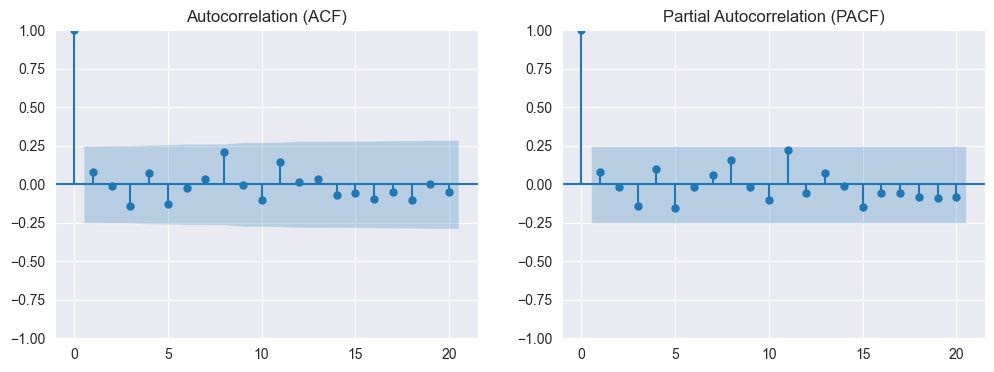

üöÄ Entra√Ænement du mod√®le ARIMA avec (p=1, d=1, q=1)...
                               SARIMAX Results                                
Dep. Variable:                Cl√¥ture   No. Observations:                   61
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -623.675
Date:                Thu, 13 Feb 2025   AIC                           1253.351
Time:                        20:23:31   BIC                           1259.634
Sample:                    02-01-2020   HQIC                          1255.808
                         - 02-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0831      0.206      0.403      0.687      -0.321       0.487
ma.L1         -0.9680      0.121     -8.026      0.000      -1.204    

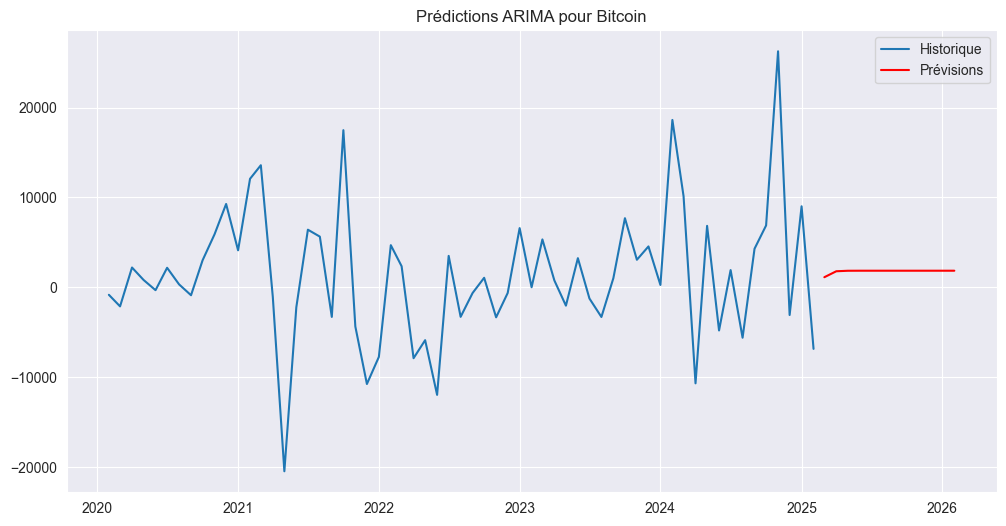

In [98]:
# üìå Importation des biblioth√®ques
import pandas as pd  # Manipulation des donn√©es CSV
import numpy as np  # Calculs num√©riques
import statsmodels.api as sm  # Mod√©lisation statistique
import matplotlib.pyplot as plt  # Visualisation des r√©sultats
from statsmodels.tsa.arima.model import ARIMA  # Mod√®le ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf  # Tests statistiques pour s√©ries temporelles

# üìÇ D√©finition des fichiers CSV pour diff√©rents actifs financiers
files = {
    "Bitcoin": "Bitcoin_5_ans_par_mois.csv",
    "Or": "Or_5_ans_par_mois.csv",
    "S&P 500": "S&P 500_5_ans_par_mois.csv"
}

def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)

    # üîπ Cr√©er une colonne "Date" en combinant "Ann√©e" et "Mois"
    df["Date"] = pd.to_datetime(df["Ann√©e"].astype(str) + "-" + df["Mois"].astype(str) + "-01")
    df.set_index("Date", inplace=True)  # D√©finir "Date" comme index temporel

    # üîπ D√©finir explicitement la fr√©quence mensuelle
    df.index = pd.to_datetime(df.index)  # Convertir en format datetime si ce n'est pas le cas
    df = df.asfreq("MS")  # Force une fr√©quence mensuelle (Month Start)

    # üîπ S√©lection de la colonne "Cl√¥ture" pour l'analyse ARIMA
    df = df[["Cl√¥ture"]].dropna()  # Supprime les valeurs manquantes

    return df

# üèÜ S√©lection de l'actif √† analyser (Modifier selon le besoin)
asset_name = "Bitcoin"  # Remplacer par "Or" ou "S&P 500"
df = load_and_prepare_data(files[asset_name])

# üìà Test de stationnarit√© avec Augmented Dickey-Fuller (ADF)
def test_stationarity(series):
    result = adfuller(series)  # Appliquer le test ADF
    print("Test ADF (Dickey-Fuller) :")
    print(f"Statistique : {result[0]}")  # Statistique du test
    print(f"P-valeur : {result[1]}")  # P-valeur du test
    if result[1] > 0.05:  # Seuil de signification 5%
        print("‚ö†Ô∏è La s√©rie n'est PAS stationnaire (p > 0.05). Diff√©renciation appliqu√©e.")
        return series.diff().dropna(), True  # Appliquer une diff√©renciation si n√©cessaire
    else:
        print("‚úÖ La s√©rie est stationnaire (p <= 0.05)")
        return series, False  # Aucun traitement suppl√©mentaire n√©cessaire

df['Cl√¥ture'], differentiated = test_stationarity(df['Cl√¥ture'])

# üìä Analyse ACF et PACF pour choisir p et q
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# üîπ ACF (AutoCorrelation Function) pour identifier q (MA)
sm.graphics.tsa.plot_acf(df['Cl√¥ture'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation (ACF)")

# üîπ PACF (Partial AutoCorrelation Function) pour identifier p (AR)
sm.graphics.tsa.plot_pacf(df['Cl√¥ture'].dropna(), lags=20, ax=axes[1])
axes[1].set_title("Partial Autocorrelation (PACF)")

plt.show()  # Afficher les graphiques pour aider au choix des param√®tres

# ‚öôÔ∏è D√©finition des param√®tres ARIMA en fonction des graphiques ACF/PACF
p = 1  # Si PACF coupe apr√®s lag 1
d = 1 if differentiated else 0  # Applique d=1 si diff√©renciation n√©cessaire
q = 1  # Si ACF coupe apr√®s lag 1

# üî• Entra√Ænement du mod√®le ARIMA avec les param√®tres s√©lectionn√©s
print(f"üöÄ Entra√Ænement du mod√®le ARIMA avec (p={p}, d={d}, q={q})...")
model = ARIMA(df['Cl√¥ture'].dropna(), order=(p, d, q))
model_fit = model.fit()

# üìú Affichage du r√©sum√© du mod√®le ARIMA
print(model_fit.summary())

# üìÖ G√©n√©ration de pr√©visions sur 12 mois
forecast_steps = 12  # Nombre de mois √† pr√©voir
forecast = model_fit.forecast(steps=forecast_steps)  # G√©n√©ration des pr√©visions

# üìä Affichage des pr√©visions ARIMA
plt.figure(figsize=(12,6))
plt.plot(df, label="Historique")  # Donn√©es r√©elles
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq="MS")[1:], forecast, label="Pr√©visions", color='red')  # Pr√©dictions
plt.legend()
plt.title(f"Pr√©dictions ARIMA pour {asset_name}")
plt.show()


In [97]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer les erreurs quadratiques moyennes (RMSE)
predictions = model_fit.predict(start=0, end=len(bitcoin_data)-1)
rmse = np.sqrt(mean_squared_error(bitcoin_data['Cl√¥ture'], predictions))
print(f"RMSE: {rmse}")


RMSE: 50095.37131656162
